<a href="https://colab.research.google.com/github/SamiraMali1/Succinct/blob/master/Mali_ECE_CS_5424_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE-5424 / CS-5824 Advanced Machine Learning
# Assignment 2: Coding [60 pts]

In this assignment, you need to complete the following two sections:
1. Logistic regression
2. Regularization

## Submission guideline

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Virginia Tech PID below.
3. Select Edit -> Clear All Output. This will clear all the outputs from all cells (but will keep the content of the cells).
4. Select Runtime -> Restart and Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Print -> Save as PDF, or you can use the provided code at the end of this notebook.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. 
7. Upload the PDF file and this notebook **INDEPENDENTLY**.
8. Please **DO NOT** upload any data.

### Please Write Your VT PID Here: 

smali



# Section 0. Environment Set Up

Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Append the directory to your python path using sys.

**Please do modify the `customized_path_to_your_homework` to where you uploaded your homework in the Google Drive**.

In [ ]:
import sys
import os
import math

# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = '/content/gdrive/MyDrive/Colab Notebooks/HW2'
sys.path.append(customized_path_to_your_homework)

# Section 1. Logistic Regression [30 pts]:

The following logistic regression assignment is modified from [Stanford CS229](http://cs229.stanford.edu//). Please complete and hand in this completed worksheet.

## Logistic Regression
In this section, you need to implement logsitic regression to solve a binary classification problem. Let's first get our data ready:

In [ ]:
import os
logistic_x_data_path = os.path.join(customized_path_to_your_homework, 'data/logistic_x_.txt')
logistic_y_data_path = os.path.join(customized_path_to_your_homework, 'data/logistic_y_.txt')

In [ ]:
def feature_normalize(X):
    
    # feature_normalize: Normalizes the features in X 
    # feature_normalize(X): returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1. 
    # This is often a good preprocessing step to do when working with learning algorithms.
    
    mu     = 0
    sigma  = 0
    mu     = np.mean(X, 0)
    sigma  = np.std(X, 0)
    X      = (X - mu) / sigma
    X_norm = X
  
    return X_norm, mu, sigma

In [ ]:
import numpy as np
# Only use the first 70 samples for training (and validation),
# and treat the rest of them as hold-out testing set.
X = np.loadtxt(logistic_x_data_path) 
y = np.loadtxt(logistic_y_data_path).reshape(-1, 1) 

X, mu, std = feature_normalize(X)

# Add a column of ones to X for the bias weight.
m = len(X)
X = np.concatenate((np.ones((m, 1)), X), axis=1)

Here, the input $x^{(i)}\in\mathbb{R^2}$ and $y^{(i)}\in\{-1, 1\}$. Like we have mentioned, it is better to visualize the data first before you start working on it.

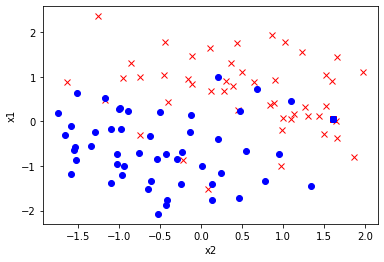

In [ ]:
# Plot the feature according to their class label.
# Note that we exclude column 0, which is the colunm we padded with one in the previous block.
import matplotlib.pyplot as plt
plt.plot(X[np.where(y==1), 1], X[np.where(y==1), 2], 'rx')
plt.plot(X[np.where(y==-1), 1], X[np.where(y==-1), 2], 'bo')  
plt.xlabel('x2')
plt.ylabel('x1')
plt.show()

In the following, you need to implement logistic regression. Recall that when $y^{(i)}\in{-1,1}$, the objective function for binary logistic regression can be expressed as:
\begin{equation*}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\log{\left(1+e^{-y^{(i)}\theta^Tx^{(i)}}\right)}=-\frac{1}{m}\sum_{i=1}^m\log{\left(h_{\theta}(y^{(i)}x^{(i)})\right)}
\end{equation*}
where the hypothesis is the **sigmoid function**: 
\begin{equation*}
h_\theta(y^{(i)}x^{(i)})=\frac{1}{1+e^{-y^{(i)}\theta^{T}x^{(i)}}}
\end{equation*}
which we have seen in class (and assignment 0). Similar to the previous section, we can minimize the objective function $J(\theta)$ using  batch gradient descent:
\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}h_\theta(-y^{(i)}x^{(i)})(-y^{(i)}x_j^{(i)})
\end{equation*}

Now, your task is to complete the function `sigmoid`, `compute_cost`, `compute_gradient`, and `gradient_descent__logistic` for logistic regression.

In [ ]:
def sigmoid(z):
    #####################################################################
    # Instructions: Implement sigmoid function g                        #
    #####################################################################
    #z=np.dot(y,theta.T,X)
    g = 1 / (1 + np.exp(-z))
    pass
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return g

def compute_cost(X, y, theta):
    
    # You need to return the following variables correctly 
    J = 0;
    #####################################################################
    # Instructions: Implement the objective function J(theta)           #
    #####################################################################
    pass
    h = sigmoid(np.dot(X,theta))
    cost = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    J = 1/m * sum(cost)  
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    return J

def compute_gradient(X, y, theta):
    #####################################################################
    # Instructions: Implement gradient function gradient_               #
    #####################################################################
    pass
    h2 = sigmoid(np.dot(X,theta))
    gradient_ = 1/m * (np.dot(X.transpose(), (h2-y)))
    #####################################################################
    #                       END OF YOUR CODE                            #
    #####################################################################
    #print (gradient_)
    return gradient_


def gradient_descent_logistic(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for iter in range(num_iters):

        #####################################################################
        # Instructions: Perform a single gradient step on the parameter     #
        #               vector theta using the implemented compute_gradient #
        #                                                                   #      
        # Hint: While debugging, it can be useful to print out the values   #
        #       of the cost function (compute_cost) and gradient here.      # 
        #####################################################################
        grad=compute_gradient(X, y, theta)
        theta = theta - alpha* grad
        pass
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
    

        # Save the cost J in every iteration 
        J = compute_cost(X, y, theta)
        print(J)
        J_history.append(J)
    
    return theta, J_history

Now, fit your model, and see if it is learning.

In [ ]:
# Train your model.
theta = np.zeros((X.shape[1], 1))
alpha = 0.1;
num_iters = 400;
theta, J_history = gradient_descent_logistic(X, y, theta, alpha, num_iters)

[0.60179988]
[0.51554018]
[0.43401935]
[0.356874]
[0.28374032]
[0.21426487]
[0.14811213]
[0.08496915]
[0.02454792]
[-0.03341402]
[-0.08915407]
[-0.14288585]
[-0.19480093]
[-0.24507068]
[-0.29384822]
[-0.34127033]
[-0.38745919]
[-0.432524]
[-0.47656247]
[-0.51966214]
[-0.56190154]
[-0.60335123]
[-0.64407471]
[-0.68412924]
[-0.72356653]
[-0.76243337]
[-0.80077215]
[-0.83862139]
[-0.87601608]
[-0.91298813]
[-0.94956665]
[-0.98577823]
[-1.02164723]
[-1.05719598]
[-1.09244498]
[-1.12741308]
[-1.16211764]
[-1.19657466]
[-1.23079893]
[-1.2648041]
[-1.29860282]
[-1.3322068]
[-1.36562693]
[-1.39887329]
[-1.43195528]
[-1.46488165]
[-1.49766053]
[-1.53029953]
[-1.56280574]
[-1.59518579]
[-1.62744589]
[-1.65959184]
[-1.69162909]
[-1.72356273]
[-1.75539758]
[-1.78713811]
[-1.81878858]
[-1.85035295]
[-1.88183499]
[-1.91323823]
[-1.94456599]
[-1.97582144]
[-2.00700752]
[-2.03812706]
[-2.06918271]
[-2.10017698]
[-2.13111225]
[-2.16199077]
[-2.19281467]
[-2.22358599]
[-2.25430665]
[-2.28497847]
[-2.315

Again, plot and check to see if the model is converging.

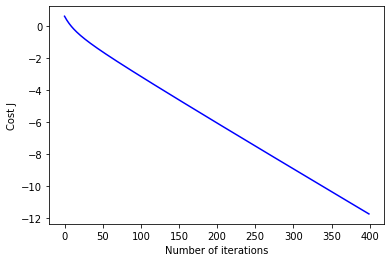

In [ ]:
plt.plot(list(range(0, len(J_history))), J_history, '-b')  
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

## Decision Boundary
In addition to checking convergence graph and accuracy, we can also plot out the decision boundary to see what does the model actually learn.

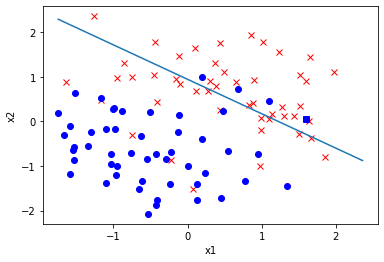

In [ ]:
# Plot the feature according to their class label.
# Note that we exclude column 0, which is the colunm we padded with one in the previous block.
plt.plot(X[np.where(y==1), 1], X[np.where(y==1), 2], 'rx')
plt.plot(X[np.where(y==-1), 1], X[np.where(y==-1), 2], 'bo')

#####################################################################
# Instructions: Plot out the decision boundary.                     #
# Hint: To plot the boundary, which is a straight line in our case, #
#       you need to find the two ends of the line, and plot it with #
#       plt.plot(). Note that the decision boundary is the line that#
#       y = 0.                                                      # 
#####################################################################
plot_x = [np.min(X[:,1]), np.max(X[:,2])]
# I found the decision boundary in this way mentioned in Piazza:
# Set the DB equation equal to theta_0 + theta_1 * x_1 + theta_2 * x_2
# Thus, DB(X) = theta_0 + theta_1 * x_1 + theta_2 * x_2
# We assume DB(X) = 0
# We get the equation of the form x_2 = f(x_1) and plot it.
plot_y = (-1./theta[2]) * ((theta[1] * (plot_x) + theta[0]))
plt.plot(plot_x, plot_y, label='Decision boundary')
pass
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# Section 2. Regularization [30 pts]:

In this section, you need to incorporate L2 regularization into your logistic regression. 

## L2 Regularization
Overfitting is a notorious problem in the world of machine learning. One simple way to counter this issue is to put constraints on your model weights $\theta$, as we have discussed in class. In this section, you need to modify the the objective function to impose L2 regularization on the logistic regression:
\begin{equation*}
    J(\theta) = -\frac{1}{m}\sum_{i=1}^m\log{\left(h_{\theta}(y^{(i)}x^{(i)})\right)} + \lambda\vert\vert\theta\vert\vert_2^2
\end{equation*}
Derive the gradient for this new objective to incorporate it into your logistic regression model.

To make things much structural, we now put everything together into a class. Please use the class template below to implement your logistic regression. Note that you can add your own class methods if needed.

In [ ]:
class LogisticRegression(object):
    
    def __init__(self, alpha=0.1, lamb=0.1, regularization=None):
        # setting the class attribute.
        self.alpha = alpha                   # Set up your learning rate alpha.
        self.lamb = lamb                     # Strength of regularization.
        self.regularization = regularization 
        assert regularization == 'l2' or regularization == None # we only consider these two cases

    def sigmoid(z):
        g = 1 / (1 + np.exp(-z))
        return g

    def _compute_cost(self, X, y):
        #####################################################################
        # Instructions: Compute the cost function here.                     #
        #               You need to handle both the cases with, and without #
        #               regularization here.                                #
        #####################################################################
        if (regularization == None):
          J=compute_cost(X,y,self.theta)  
        else:  
          h = sigmoid(np.dot(X,theta))
          cost = (-y * np.log(h)) - ((1-y)*np.log(1-h))
          l2 = np.sum(np.power(theta,2))
          J = 1/m * sum(cost) + lamb * np.power(l2 , 2)
        pass
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return J
        
    def _compute_gradient(self, X, y):
        #####################################################################
        # Instructions: Compute the gradient here.                          #
        #               You need to handle both the cases with, and without #
        #               regularization here.                                #
        #####################################################################
        if (regularization == None):
            gradient_=compute_gradient(X, y, theta)  
        else: 
            h2 = sigmoid(np.dot(X,theta))
            gradient_ = 1/m * (np.dot(X.transpose(), (h2-y)))
            regularization = (self.lamb / m) * self.theta
            gradient= gradi + regularization
        pass
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return gradient

    def fit(self, X, y, num_iter=5):
        self.theta = np.zeros((X.shape[1], 1))
        m = len(y)
        J_history = []
        #####################################################################
        # Instructions: Run the gradient decsent here.                      #
        #####################################################################
        for i in range(num_iters):
            grad= self._compute_gradient(X, y) 
            theta = theta-alpha*grad
            J = self._compute_cost(X, y)
            J_history  = J_history.append(J)
        pass
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return J_history
    
    def predict(self, X):
        #####################################################################
        # Instructions: Use your hypothese to make predictions.             #
        #####################################################################
        pass
        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
        return y_hat

Load the wine datasets, in which $x_j\in\mathbb{R}^{12}$ is different attribute for alcohol, and $y\in\{-1,1\}$ is that class label (red or white wine).

In [ ]:
# Load dataset
import numpy as np
X_train = np.loadtxt(os.path.join(customized_path_to_your_homework, 'data/wine_train_X.txt'))
y_train = np.loadtxt(os.path.join(customized_path_to_your_homework, 'data/wine_train_y.txt')).reshape(-1, 1)
X_test = np.loadtxt(os.path.join(customized_path_to_your_homework, 'data/wine_test_X.txt'))
y_test = np.loadtxt(os.path.join(customized_path_to_your_homework, 'data/wine_test_y.txt')).reshape(-1, 1)


X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

Now, let's train two different logistic regression models: one with, and one without regularization.

In [ ]:
log_reg = LogisticRegression(alpha=0.1) # Without regularization
log_reg_l2 = LogisticRegression(alpha=0.1, lamb=1.0, regularization='l2') # Without regularization

J_history = log_reg.fit(X_train, y_train, num_iter=500)
J_history_l2 = log_reg_l2.fit(X_train, y_train, num_iter=500)

UnboundLocalError: ignored

Next, we evaluate the accuracy for each method:

In [ ]:
def evaluate_accuracy(X, y, model):
    y_pred = model.predict(X)
    y_pred[y_pred > 0.5] = 1
    y_pred[y_pred <= 0.5] = -1
    return np.mean(y_pred == y)

print("Accuracy on training set: ", evaluate_accuracy(X_train, y_train, log_reg))
print("Accuracy on testing set: ", evaluate_accuracy(X_test, y_test, log_reg))
print("Accuracy w/ L2 training set: ", evaluate_accuracy(X_train, y_train, log_reg_l2))
print("Accuracy w/ L2 testing set: ", evaluate_accuracy(X_test, y_test, log_reg_l2))

To see the effect of regularization on $\theta$, we can plot out each $\theta_j$ under different $\lambda$.

In [ ]:
def plot_theta(theta, lamb):
    """
    Helper function for plotting out the value of theta with respect to different lambda.
    theta  (list): list of theta under different lambda.
    lambda (list): list of lambda values you tried.
    """
    plt.hlines(y=0, xmin=0, xmax=np.max(lamb), color='red', linewidth = 2, linestyle = '--')
    for i in range(theta.shape[1]):
        plt.plot(lamb, theta[:,i])
    plt.ylabel('theta')
    plt.xlabel('lambda')
    plt.xscale('log')
    plt.show()

## Plot:

In [ ]:
lamb = [0.1, 1, 10, 100, 1000]
theta = []

#####################################################################
# Instructions: For each value in lamb, try a model for it, and     #
#               append the trained weights into the theta           #
#####################################################################
for i in lamb:
    log_reg_l2 = LogisticRegression(alpha=0.1, lamb=i, regularization='l2')
    log_reg_l2.fit(X_train, y_train)
    theta.append(log_reg_l2.theta)
pass
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

plot_theta(np.array(theta), lamb)

# Save as PDF
Please use the following codes to save your notebook as a PDF file.

In [ ]:
#Run below two lines (in google colab), installation steps to get .pdf of the notebook

!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

#After installation, comment above two lines and run again to remove installation comments from the notebook.

In [ ]:
 Find path to your notebook file in drive and enter in below line
!jupyter nbconvert --to PDF "/content/gdrive/MyDrive/ECE 5424 ML/homework_spring/HW2/ECE_CS_5424_Assignment_2.ipynb"
#Example: "/content/gdrive/MyDrive/ECE 5424 ML/homework_spring/HW2/ECE_CS_5424_Assignment_2.ipynb"